## preprocess

In [3]:
import pandas as pd
import numpy as np
import glob
import os

# Increase max columns to display
pd.set_option('display.max_columns', None)   # show all columns
pd.set_option('display.width', 2000)         # make the line wider
pd.set_option('display.max_colwidth', None)  # don't truncate column content
# Folder path
folder_path = r"C:\Arun-MIX\20251010\Synthetic Data"

# Get all CSV file paths in the folder
all_files = glob.glob(os.path.join(folder_path, "*.csv"))

# Read and combine all CSV files
df = pd.concat((pd.read_csv(file) for file in all_files), ignore_index=True)

# Check the combined dataframe
print(df.info())
df.head()
df_filter = df.iloc[:,:36]
df_filter.head()
column_rename_map = {
        'DESYNPUF_ID': 'Beneficiary_ID',
        'CLM_ID': 'Claim_ID',
        'SEGMENT': 'Claim_Type',
        'CLM_FROM_DT': 'Claim_Start_Date',
        'CLM_THRU_DT': 'Claim_End_Date',
        'PRVDR_NUM': 'Provider_ID',
        'CLM_PMT_AMT': 'Claim_Payment_Amount',
        'NCH_PRMRY_PYR_CLM_PD_AMT': 'Primary_Payer_Amount', #Payment made by the primary payer (other than Medicare).
        'AT_PHYSN_NPI': 'Attending_Physician_NPI', #Attending physician’s National Provider Identifier.
        'OP_PHYSN_NPI': 'Operating_Physician_NPI', #Operating physician’s NPI.
        'OT_PHYSN_NPI': 'Other_Physician_NPI', #Other physician’s NPI.
        'CLM_ADMSN_DT': 'Admission_Date',
        'ADMTNG_ICD9_DGNS_CD': 'Admission_ICD9_Diagnosis',
        'CLM_PASS_THRU_PER_DIEM_AMT': 'Pass_Through_Per_Diem_Amount', #Additional payment amount per day (pass-through payments).
        'NCH_BENE_IP_DDCTBL_AMT': 'Inpatient_Deductible_Amount', #Inpatient deductible amount.
        'NCH_BENE_PTA_COINSRNC_LBLTY_AM': 'Patient_Coinsurance_Liability',#Patient coinsurance liability.
        'NCH_BENE_BLOOD_DDCTBL_LBLTY_AM': 'Blood_Deductible_Amount',#Patient blood deductible amount.
        'CLM_UTLZTN_DAY_CNT': 'Utilization_Day_Count',
        'NCH_BENE_DSCHRG_DT': 'Discharge_Date',
        'CLM_DRG_CD': 'DRG_Code',
    'ICD9_DGNS_CD_1': 'ICD9_Diagnosis_Code_1',
    'ICD9_DGNS_CD_2': 'ICD9_Diagnosis_Code_2',
    'ICD9_DGNS_CD_3': 'ICD9_Diagnosis_Code_3',
    'ICD9_DGNS_CD_4': 'ICD9_Diagnosis_Code_4',
    'ICD9_DGNS_CD_5': 'ICD9_Diagnosis_Code_5',
    'ICD9_DGNS_CD_6': 'ICD9_Diagnosis_Code_6',
    'ICD9_DGNS_CD_7': 'ICD9_Diagnosis_Code_7',
    'ICD9_DGNS_CD_8': 'ICD9_Diagnosis_Code_8',
    'ICD9_DGNS_CD_9': 'ICD9_Diagnosis_Code_9',
    'ICD9_DGNS_CD_10': 'ICD9_Diagnosis_Code_10',
    'ICD9_PRCDR_CD_1': 'ICD9_Procedure_Code_1',
    'ICD9_PRCDR_CD_2': 'ICD9_Procedure_Code_2',
    'ICD9_PRCDR_CD_3': 'ICD9_Procedure_Code_3',
    'ICD9_PRCDR_CD_4': 'ICD9_Procedure_Code_4',
    'ICD9_PRCDR_CD_5': 'ICD9_Procedure_Code_5',
    'ICD9_PRCDR_CD_6': 'ICD9_Procedure_Code_6',
}

# HCPCS columns (all empty in this dataset)
for i in range(1, 46):
    column_rename_map[f'HCPCS_CD_{i}'] = f'HCPCS_Code_{i}'

# Apply the rename in pandas
df_filter.rename(columns=column_rename_map, inplace=True)

df_filter.head()

# Convert to string (which preserves NaNs as 'nan'), then parse to datetime with errors coerced to NaT
df_filter['Claim_Start_Date'] = pd.to_datetime(df_filter['Claim_Start_Date'].astype('Int64').astype(str), format='%Y%m%d', errors='coerce')
# Format dates to yyyy-mm-dd; NaT will become NaN after formatting, which you can keep or fill as needed
df_filter['Claim_Start_Date'] = df_filter['Claim_Start_Date'].dt.strftime('%Y-%m-%d')

# Convert to string (which preserves NaNs as 'nan'), then parse to datetime with errors coerced to NaT
df_filter['Claim_End_Date'] = pd.to_datetime(df_filter['Claim_End_Date'].astype('Int64').astype(str), format='%Y%m%d', errors='coerce')
# Format dates to yyyy-mm-dd; NaT will become NaN after formatting, which you can keep or fill as needed
df_filter['Claim_End_Date'] = df_filter['Claim_End_Date'].dt.strftime('%Y-%m-%d')

# Convert to string (which preserves NaNs as 'nan'), then parse to datetime with errors coerced to NaT
df_filter['Admission_Date'] = pd.to_datetime(df_filter['Admission_Date'].astype('Int64').astype(str), format='%Y%m%d', errors='coerce')
# Format dates to yyyy-mm-dd; NaT will become NaN after formatting, which you can keep or fill as needed
df_filter['Admission_Date'] = df_filter['Admission_Date'].dt.strftime('%Y-%m-%d')

# Convert to string (which preserves NaNs as 'nan'), then parse to datetime with errors coerced to NaT
df_filter['Discharge_Date'] = pd.to_datetime(df_filter['Discharge_Date'].astype('Int64').astype(str), format='%Y%m%d', errors='coerce')
# Format dates to yyyy-mm-dd; NaT will become NaN after formatting, which you can keep or fill as needed
df_filter['Discharge_Date'] = df_filter['Discharge_Date'].dt.strftime('%Y-%m-%d')

df_filter.head()
df_filter = df_filter.dropna(subset=['Claim_Start_Date'])
df_filter = df_filter.dropna(subset=['Admission_ICD9_Diagnosis'])
print(df_filter.info())
df_filter.head()
df_filter = df_filter[df_filter['Claim_Payment_Amount'] > 0]
print(df_filter.info())
df_filter.head()
# List of A_DX columns
"""adx_cols = [f"ICD9_Diagnosis_Code_{i}" for i in range(1, 11)]

df_filter["ICD9_Diagnosis_Code_List"] = df_filter[adx_cols].apply(
    lambda row: sorted(
        [str(x).strip() for x in row if pd.notna(x) and str(x).strip() != ""]
    ),
    axis=1
)"""

# All A_DX columns
bdx_cols = [f"ICD9_Procedure_Code_{i}" for i in range(1, 7)]

df_filter["ICD9_Procedure_Code_List"] = df_filter[bdx_cols].apply(
    lambda row: sorted(
        [str(x).strip() for x in row if pd.notna(x) and str(x).strip() != ""]
    ),
    axis=1
)

# List of A_DX columns
adx_cols = [f"ICD9_Diagnosis_Code_{i}" for i in range(1, 11)]

# Columns to combine (A_DX + Admission_ICD9_Diagnosis)
cols_to_combine = adx_cols + ["Admission_ICD9_Diagnosis"]

# Combine and clean values into a single list
df_filter["ICD9_Diagnosis_Code_List_PX"] = df_filter[cols_to_combine].apply(
    lambda row: sorted(
        [str(x).strip() for x in row if pd.notna(x) and str(x).strip() != ""]
    ),
    axis=1
)

# Check result
#df_filter[["Admission_ICD9_Diagnosis", "ICD9_Diagnosis_Code_List"]].head()


# Check result
df_filter.info()

df_filter = df_filter.drop(df_filter.columns[20:36], axis=1, inplace=False)
df_filter.info()
cols_to_drop = [
    'Claim_Type', 'Claim_ID', 'Beneficiary_ID', 'Claim_Start_Date', 
    'Claim_End_Date',  'Attending_Physician_NPI', 
    'Operating_Physician_NPI', 'Other_Physician_NPI', 'Admission_Date', 'Discharge_Date',
    'Primary_Payer_Amount','Pass_Through_Per_Diem_Amount','Inpatient_Deductible_Amount',
    'Patient_Coinsurance_Liability','Blood_Deductible_Amount'
]

df_filter.drop(columns=cols_to_drop, inplace=True)
df_filter.info()

unique_values = set()  # to automatically remove duplicates

for row in df_filter['ICD9_Procedure_Code_List']:
    unique_values.update(row)   # add elements of each row list into the set

# convert set to list
unique_list = list(unique_values)

# make a DataFrame
df_unique = pd.DataFrame(unique_list, columns=['Unique_Procedure_Code_Codes'])

print(df_unique.info())
df_unique.head()
def clean_Procedure_Code_list(code_list):
    cleaned = []
    for code in code_list:
        # Convert everything to string
        code_str = str(code).strip()
        # Remove trailing ".0" if present
        if code_str.endswith('.0'):
            code_str = code_str[:-2]
        cleaned.append(code_str)
    return cleaned

# Apply the cleaning function to the column
df_filter['ICD9_Procedure_Code_List'] = df_filter['ICD9_Procedure_Code_List'].apply(clean_Procedure_Code_list)
unique_values = set()  # to automatically remove duplicates

for row in df_filter['ICD9_Procedure_Code_List']:
    unique_values.update(row)   # add elements of each row list into the set

# convert set to list
unique_list = list(unique_values)

# make a DataFrame
df_unique = pd.DataFrame(unique_list, columns=['Unique_Procedure_Code_Codes'])

print(df_unique.info())
#df_unique.head()
df_filter.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332822 entries, 0 to 1332821
Data columns (total 81 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   DESYNPUF_ID                     1332822 non-null  object 
 1   CLM_ID                          1332822 non-null  int64  
 2   SEGMENT                         1332822 non-null  int64  
 3   CLM_FROM_DT                     1331533 non-null  float64
 4   CLM_THRU_DT                     1331533 non-null  float64
 5   PRVDR_NUM                       1332822 non-null  object 
 6   CLM_PMT_AMT                     1332822 non-null  float64
 7   NCH_PRMRY_PYR_CLM_PD_AMT        1332822 non-null  float64
 8   AT_PHYSN_NPI                    1319470 non-null  float64
 9   OP_PHYSN_NPI                    776629 non-null   float64
 10  OT_PHYSN_NPI                    154635 non-null   float64
 11  CLM_ADMSN_DT                    1332822 non-null  int64  
 12  

,Provider_ID,Claim_Payment_Amount,Admission_ICD9_Diagnosis,Utilization_Day_Count,DRG_Code,ICD9_Procedure_Code_List,ICD9_Diagnosis_Code_List_PX
0,2600GD,4000.0,4580,1.0,217,[],"[2720, 4019, 4280, 4580, 73300, 7802, 78820, E9330, V4501, V4502]"
1,3900MB,26000.0,7866,6.0,201,[],"[1970, 19889, 2724, 2768, 4019, 5849, 5853, 71590, 7843, 7866]"
2,3900HM,5000.0,6186,2.0,750,"[6186, 7092, V5866]","[2948, 56400, 6186, 6186]"
3,3913XU,5000.0,29590,3.0,883,[],"[29590, 29623, 30390, 32723, 34590, 71690, V1581]"
4,3900MB,16000.0,5849,5.0,983,[E8889],"[2639, 3542, 3569, 4019, 4271, 5849, 7840, 7856, 78820, V8801]"


In [4]:
unique_values = set()  # to automatically remove duplicates

for row in df_filter['ICD9_Diagnosis_Code_List_PX']:
    unique_values.update(row)   # add elements of each row list into the set

# convert set to list
unique_list = list(unique_values)

# make a DataFrame
df_unique = pd.DataFrame(unique_list, columns=['Unique_ICD9_Diagnosis_Codes'])

print(df_unique.info())
df_unique.head()

import pandas as pd
import re

file_path = r"C:\Users\Arunkumara\Downloads\cmsv28_master_descriptions\CMS28_DESC_SHORT_DX.txt"

# Read the file
with open(file_path, "r", encoding="latin-1") as f:
    lines = [line.strip() for line in f if line.strip()]

# Convert into DataFrame
ICD_9_des = pd.DataFrame(lines, columns=["raw_text"])

# Split into Code and Description
# Regex explanation:
# ^([A-Z0-9]+)   -> code starts with letters or digits
# \s+            -> one or more spaces
# (.*)$          -> rest of line is description
ICD_9_des[['Code', 'Description']] = ICD_9_des['raw_text'].str.extract(r'^([A-Z0-9]+)\s+(.*)$')

# Check result
print(ICD_9_des.info())
print(ICD_9_des.head(10))

# Rename to common column name for merging
df_unique = df_unique.rename(columns={'Unique_ICD9_Diagnosis_Codes': 'Code'})

# Merge on 'Code'
df_mapped = df_unique.merge(ICD_9_des[['Code', 'Description']], on='Code', how='left')

# Now df_mapped will have 'Code' and 'Description' columns
df_mapped.info()

# Create a mapping dictionary
code_to_desc = dict(zip(df_mapped['Code'], df_mapped['Description']))

# Function to map list of ICD codes to descriptions
def map_icd_list_to_desc(code_list):
    # Convert codes to strings to match df2
    return [code_to_desc.get(str(code), "") for code in code_list]

# Apply function
df_filter['Description_List'] = df_filter['ICD9_Diagnosis_Code_List_PX'].apply(map_icd_list_to_desc)
print(df_filter.info())
df_filter.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7903 entries, 0 to 7902
Data columns (total 1 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unique_ICD9_Diagnosis_Codes  7903 non-null   object
dtypes: object(1)
memory usage: 61.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14432 entries, 0 to 14431
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   raw_text     14432 non-null  object
 1   Code         14432 non-null  object
 2   Description  14432 non-null  object
dtypes: object(3)
memory usage: 338.4+ KB
None
                         raw_text  Code               Description
0  0010  Cholera d/t vib cholerae  0010  Cholera d/t vib cholerae
1    0011  Cholera d/t vib el tor  0011    Cholera d/t vib el tor
2               0019  Cholera NOS  0019               Cholera NOS
3             0020  Typhoid fever  0020             T

,Provider_ID,Claim_Payment_Amount,Admission_ICD9_Diagnosis,Utilization_Day_Count,DRG_Code,ICD9_Procedure_Code_List,ICD9_Diagnosis_Code_List_PX,Description_List
0,2600GD,4000.0,4580,1.0,217,[],"[2720, 4019, 4280, 4580, 73300, 7802, 78820, E9330, V4501, V4502]","[Pure hypercholesterolem, Hypertension NOS, CHF NOS, Orthostatic hypotension, Osteoporosis NOS, Syncope and collapse, Retention urine NOS, Adv eff anallrg/antemet, Status cardiac pacemaker, Status autm crd dfbrltr]"
1,3900MB,26000.0,7866,6.0,201,[],"[1970, 19889, 2724, 2768, 4019, 5849, 5853, 71590, 7843, 7866]","[Secondary malig neo lung, Secondary malig neo NEC, Hyperlipidemia NEC/NOS, Hypopotassemia, Hypertension NOS, Acute kidney failure NOS, Chr kidney dis stage III, Osteoarthros NOS-unspec, Aphasia, Chest swelling/mass/lump]"
2,3900HM,5000.0,6186,2.0,750,"[6186, 7092, V5866]","[2948, 56400, 6186, 6186]","[Mental disor NEC oth dis, Constipation NOS, Vaginal enterocele, Vaginal enterocele]"
3,3913XU,5000.0,29590,3.0,883,[],"[29590, 29623, 30390, 32723, 34590, 71690, V1581]","[Schizophrenia NOS-unspec, Depress psychosis-severe, Alcoh dep NEC/NOS-unspec, Obstructive sleep apnea, Epilep NOS w/o intr epil, Arthropathy NOS-unspec, Hx of past noncompliance]"
4,3900MB,16000.0,5849,5.0,983,[E8889],"[2639, 3542, 3569, 4019, 4271, 5849, 7840, 7856, 78820, V8801]","[Protein-cal malnutr NOS, Ulnar nerve lesion, Idio periph neurpthy NOS, Hypertension NOS, Parox ventric tachycard, Acute kidney failure NOS, Headache, Enlargement lymph nodes, Retention urine NOS, Acq absnce cervix/uterus]"


## pretrained model

#### 7

#### 6

Generating embeddings: 100%|██████████| 125/125 [05:35<00:00,  2.69s/it]



🔍 Finding optimal K using Elbow method...


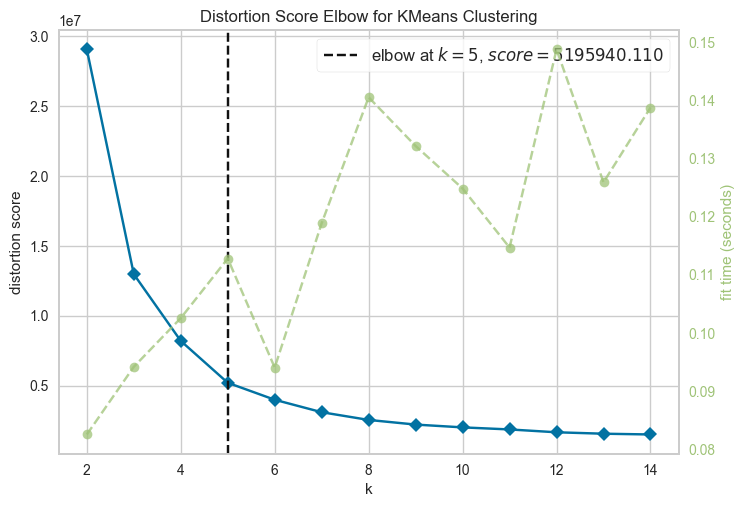


✅ Optimal number of clusters (Elbow): 5
✅ KMeans: Silhouette=0.518, Davies-Bouldin=0.580, Clusters=5
✅ GaussianMixture: Silhouette=0.518, Davies-Bouldin=0.580, Clusters=5
✅ Agglomerative: Silhouette=0.499, Davies-Bouldin=0.596, Clusters=5


c:\Users\Arunkumara\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Arunkumara\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


✅ HDBSCAN: Silhouette=0.041, Davies-Bouldin=1.392, Clusters=7

🏆 Best Performing Model: KMeans

📊 Performance Summary:
              Model  Silhouette_Score  Davies_Bouldin  Num_Clusters  Silhouette_Score_Rank  Davies_Bouldin_Rank  Overall_Score
0           KMeans          0.518066        0.580436             5                    1.5                  1.5            1.5
1  GaussianMixture          0.518066        0.580436             5                    1.5                  1.5            1.5
2    Agglomerative          0.498778        0.596057             5                    3.0                  3.0            3.0
3          HDBSCAN          0.041133        1.391729             7                    4.0                  4.0            4.0

✅ Cosine similarity matrix shape: (2000, 2000)

🔎 Calculating cluster-level similarity scores...


KeyError: 29

In [ ]:
# ===============================================================
# 🧠 DiagBERT + Multi-Model Clustering + Cosine Similarity Scoring
# ===============================================================

from transformers import AutoTokenizer, AutoModel
import torch
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import hdbscan
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# ---------------------------------------------------------------
# 1️⃣ Load model and tokenizer
# ---------------------------------------------------------------
model_name = "Emmytheo/DiagBERT"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name, output_hidden_states=True)
model.eval()

# ---------------------------------------------------------------
# 2️⃣ Load dataset
# ---------------------------------------------------------------
# Example: df = pd.read_csv("claims_data.csv")
# Must include: Description_List, Claim_Payment_Amount, Utilization_Day_Count, Provider_ID
df = df_filter.iloc[:2000, :].copy()
text_col = "Description_List"

# ---------------------------------------------------------------
# 3️⃣ Generate DiagBERT embeddings
# ---------------------------------------------------------------
def get_diagbert_embeddings(text_list, tokenizer, model, batch_size=16, max_len=128):
    embeddings = []
    for i in tqdm(range(0, len(text_list), batch_size), desc="Generating embeddings"):
        batch_texts = text_list[i:i + batch_size]
        encoded = tokenizer(batch_texts, padding=True, truncation=True,
                            max_length=max_len, return_tensors="pt")
        with torch.no_grad():
            outputs = model(**encoded)
            hidden_states = outputs.hidden_states[-1]
            cls_embeddings = hidden_states[:, 0, :]  # CLS token representation
            embeddings.append(cls_embeddings)
    return torch.cat(embeddings).cpu().numpy()

texts = df[text_col].fillna("").astype(str).tolist()
embeddings = get_diagbert_embeddings(texts, tokenizer, model)

# ---------------------------------------------------------------
# 4️⃣ Combine embeddings with numeric + categorical
# ---------------------------------------------------------------
num_features = df[["Claim_Payment_Amount", "Utilization_Day_Count"]].fillna(0)
num_scaled = StandardScaler().fit_transform(num_features)
provider_encoded = pd.factorize(df["Provider_ID"])[0].reshape(-1, 1)

combined_features = np.hstack([embeddings, num_scaled, provider_encoded])

# ---------------------------------------------------------------
# 5️⃣ Find optimal K for KMeans using Yellowbrick
# ---------------------------------------------------------------
print("\n🔍 Finding optimal K using Elbow method...")
model_k = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_k, k=(2, 15))
visualizer.fit(combined_features)
visualizer.show()

best_k = visualizer.elbow_value_
print(f"\n✅ Optimal number of clusters (Elbow): {best_k}")

# ---------------------------------------------------------------
# 6️⃣ Define clustering algorithms
# ---------------------------------------------------------------
algorithms = {
    "KMeans": KMeans(n_clusters=best_k, random_state=42),
    "GaussianMixture": GaussianMixture(n_components=best_k, random_state=42),
    "Agglomerative": AgglomerativeClustering(n_clusters=best_k),
    "HDBSCAN": hdbscan.HDBSCAN(min_cluster_size=5, metric='euclidean')
}

# ---------------------------------------------------------------
# 7️⃣ Evaluate each algorithm
# ---------------------------------------------------------------
results = []

for name, algo in algorithms.items():
    try:
        labels = algo.fit_predict(combined_features)

        # Skip invalid results
        if len(set(labels)) <= 1:
            print(f"⚠️ {name}: Only one cluster found — skipping.")
            continue

        sil = silhouette_score(combined_features, labels)
        db = davies_bouldin_score(combined_features, labels)
        num_clusters = len(set(labels))

        results.append({
            "Model": name,
            "Silhouette_Score": sil,
            "Davies_Bouldin": db,
            "Num_Clusters": num_clusters
        })
        print(f"✅ {name}: Silhouette={sil:.3f}, Davies-Bouldin={db:.3f}, Clusters={num_clusters}")

        df[f"Cluster_{name}"] = labels

    except Exception as e:
        print(f"❌ Error with {name}: {e}")

# ---------------------------------------------------------------
# 8️⃣ Compare and select best model
# ---------------------------------------------------------------
results_df = pd.DataFrame(results)
results_df["Silhouette_Score_Rank"] = results_df["Silhouette_Score"].rank(ascending=False)
results_df["Davies_Bouldin_Rank"] = results_df["Davies_Bouldin"].rank(ascending=True)
results_df["Overall_Score"] = results_df[["Silhouette_Score_Rank", "Davies_Bouldin_Rank"]].mean(axis=1)

best_model = results_df.sort_values("Overall_Score").iloc[0]["Model"]
print("\n🏆 Best Performing Model:", best_model)
print("\n📊 Performance Summary:\n", results_df)

df["Final_Cluster"] = df[f"Cluster_{best_model}"]

# ---------------------------------------------------------------
# 9️⃣ Compute cosine similarity
# ---------------------------------------------------------------
cosine_sim = cosine_similarity(embeddings)
print("\n✅ Cosine similarity matrix shape:", cosine_sim.shape)




🔎 Calculating cluster-level similarity scores...

📈 Similarity scoring complete. {'Outlier': 2000}


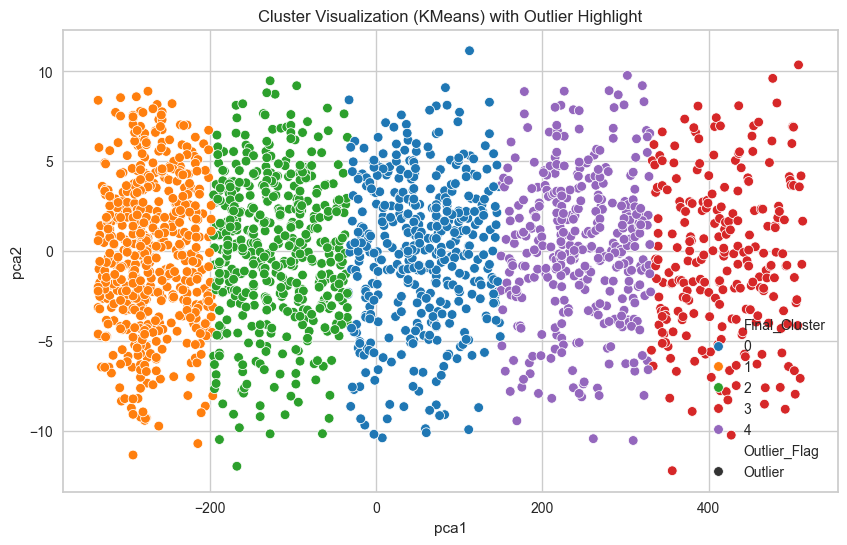


📊 Cluster Similarity Summary:
                    mean       min       max  count
Final_Cluster                                     
1              0.497862  0.248318  0.686820    543
3              0.496431  0.307094  0.630903    235
0              0.494935  0.297904  0.631066    417
4              0.493931  0.269962  0.641328    341
2              0.492405  0.330994  0.657664    464

=== Cluster 1 (KMeans) ===
  Provider_ID                                                                                                                                                                                                                Description_List  Claim_Payment_Amount  Utilization_Day_Count  Cluster_Similarity Outlier_Flag
0      2600GD          [Pure hypercholesterolem, Hypertension NOS, CHF NOS, Orthostatic hypotension, Osteoporosis NOS, Syncope and collapse, Retention urine NOS, Adv eff anallrg/antemet, Status cardiac pacemaker, Status autm crd dfbrltr]                4000.0        

In [34]:
# ---------------------------------------------------------------
# 🔟 Cluster-level similarity scoring
# ---------------------------------------------------------------
print("\n🔎 Calculating cluster-level similarity scores...")

# Find cluster centroids
cluster_ids = df["Final_Cluster"].unique()
centroids = []
for c in cluster_ids:
    centroids.append(embeddings[df["Final_Cluster"] == c].mean(axis=0))
centroids = np.vstack(centroids)

# Compute similarity between each record and its cluster centroid
cluster_sim = cosine_similarity(embeddings, centroids)
df = df.reset_index(drop=True)  # ensure clean sequential index

df["Cluster_Similarity"] = [
    cluster_sim[i, np.where(cluster_ids == df.iloc[i]["Final_Cluster"])[0][0]]
    for i in range(len(df))
]


# Flag weak members
threshold = 0.70
df["Outlier_Flag"] = np.where(df["Cluster_Similarity"] < threshold, "Outlier", "Inlier")

print(f"\n📈 Similarity scoring complete. {df['Outlier_Flag'].value_counts().to_dict()}")

# ---------------------------------------------------------------
# 1️⃣1️⃣ Visualize clusters
# ---------------------------------------------------------------
pca = PCA(n_components=2)
reduced = pca.fit_transform(combined_features)
df["pca1"], df["pca2"] = reduced[:, 0], reduced[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="pca1", y="pca2", hue="Final_Cluster", style="Outlier_Flag", palette="tab10")
plt.title(f"Cluster Visualization ({best_model}) with Outlier Highlight")
plt.show()

# ---------------------------------------------------------------
# 1️⃣2️⃣ Cluster summary
# ---------------------------------------------------------------
cluster_summary = df.groupby("Final_Cluster")["Cluster_Similarity"].agg(["mean", "min", "max", "count"]).sort_values("mean", ascending=False)
print("\n📊 Cluster Similarity Summary:\n", cluster_summary)

# ---------------------------------------------------------------
# 1️⃣3️⃣ Show examples
# ---------------------------------------------------------------
for c in df["Final_Cluster"].unique():
    print(f"\n=== Cluster {c} ({best_model}) ===")
    sample = df[df["Final_Cluster"] == c].head(5)
    print(sample[["Provider_ID", "Description_List", "Claim_Payment_Amount", "Utilization_Day_Count", "Cluster_Similarity", "Outlier_Flag"]])


#### 5

100%|██████████| 125/125 [04:39<00:00,  2.24s/it]



🔍 Finding best K for KMeans, GMM, and Agglomerative...
✅ KMeans: best_k=2, silhouette=0.622
✅ GaussianMixture: best_k=2, silhouette=0.621
✅ Agglomerative: best_k=2, silhouette=0.619
✅ KMeans: Silhouette=0.622, Davies-Bouldin=0.512, Clusters=2


C:\Users\Arunkumara\AppData\Local\Temp\ipykernel_23760\3001066551.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"Cluster_{name}"] = labels


✅ GaussianMixture: Silhouette=0.621, Davies-Bouldin=0.512, Clusters=2


C:\Users\Arunkumara\AppData\Local\Temp\ipykernel_23760\3001066551.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"Cluster_{name}"] = labels


✅ Agglomerative: Silhouette=0.619, Davies-Bouldin=0.516, Clusters=2


C:\Users\Arunkumara\AppData\Local\Temp\ipykernel_23760\3001066551.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"Cluster_{name}"] = labels
c:\Users\Arunkumara\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Arunkumara\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


✅ HDBSCAN: Silhouette=0.041, Davies-Bouldin=1.392, Clusters=7

🏆 Best Model Automatically Selected: KMeans

📊 Performance Summary:
              Model  Best_K  Silhouette_Score  Davies_Bouldin  Num_Clusters  Silhouette_Rank  Davies_Rank  Overall_Score
0           KMeans     2.0          0.621956        0.511718             2              1.0          1.0            1.0
1  GaussianMixture     2.0          0.621245        0.512360             2              2.0          2.0            2.0
2    Agglomerative     2.0          0.619174        0.515707             2              3.0          3.0            3.0
3          HDBSCAN     NaN          0.041133        1.391729             7              4.0          4.0            4.0


C:\Users\Arunkumara\AppData\Local\Temp\ipykernel_23760\3001066551.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"Cluster_{name}"] = labels
C:\Users\Arunkumara\AppData\Local\Temp\ipykernel_23760\3001066551.py:153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Final_Cluster"] = df[f"Cluster_{best_model}"]
C:\Users\Arunkumara\AppData\Local\Temp\ipykernel_23760\3001066551.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

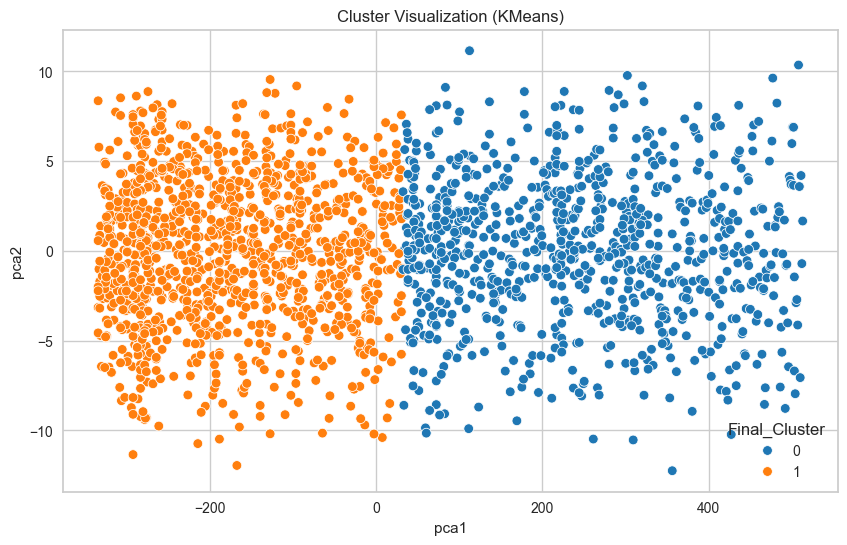


=== Cluster 1 (KMeans) ===
  Provider_ID                                                                                                                                                                                                                Description_List  Claim_Payment_Amount  Utilization_Day_Count
0      2600GD          [Pure hypercholesterolem, Hypertension NOS, CHF NOS, Orthostatic hypotension, Osteoporosis NOS, Syncope and collapse, Retention urine NOS, Adv eff anallrg/antemet, Status cardiac pacemaker, Status autm crd dfbrltr]                4000.0                    1.0
1      3900MB   [Secondary malig neo lung, Secondary malig neo NEC, Hyperlipidemia NEC/NOS, Hypopotassemia, Hypertension NOS, Acute kidney failure NOS, Chr kidney dis stage III, Osteoarthros NOS-unspec, Aphasia, Chest swelling/mass/lump]               26000.0                    6.0
2      3900HM                                                                                                              

In [32]:
# ===============================================================
# 🧠 DiagBERT + Multi-Model, Multi-K Clustering Optimization
# ===============================================================

from transformers import AutoTokenizer, AutoModel
import torch
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
import hdbscan
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------------------
# 1️⃣ Load model and tokenizer
# ---------------------------------------------------------------
model_name = "Emmytheo/DiagBERT"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name, output_hidden_states=True)
model.eval()

# ---------------------------------------------------------------
# 2️⃣ Load dataset
# ---------------------------------------------------------------
# Example: df = pd.read_csv("claims_data.csv")
df = df_filter.iloc[0:2000,:]
text_col = "Description_List"

# ---------------------------------------------------------------
# 3️⃣ Generate DiagBERT embeddings
# ---------------------------------------------------------------
def get_diagbert_embeddings(text_list, tokenizer, model, batch_size=16, max_len=128):
    embeddings = []
    for i in tqdm(range(0, len(text_list), batch_size)):
        batch_texts = text_list[i:i+batch_size]
        encoded = tokenizer(batch_texts, padding=True, truncation=True,
                            max_length=max_len, return_tensors="pt")
        with torch.no_grad():
            outputs = model(**encoded)
            hidden_states = outputs.hidden_states[-1]
            cls_embeddings = hidden_states[:, 0, :]  # CLS token
            embeddings.append(cls_embeddings)
    return torch.cat(embeddings).cpu().numpy()

texts = df[text_col].fillna("").astype(str).tolist()
embeddings = get_diagbert_embeddings(texts, tokenizer, model)

# ---------------------------------------------------------------
# 4️⃣ Combine embeddings with numeric + categorical
# ---------------------------------------------------------------
num_features = df[["Claim_Payment_Amount", "Utilization_Day_Count"]].fillna(0)
num_scaled = StandardScaler().fit_transform(num_features)
provider_encoded = pd.factorize(df["Provider_ID"])[0].reshape(-1, 1)

combined_features = np.hstack([embeddings, num_scaled, provider_encoded])

# ---------------------------------------------------------------
# 5️⃣ Search best K for each model (Silhouette-based)
# ---------------------------------------------------------------
def best_k_for_model(model_name, feature_data, k_range=range(2, 15)):
    best_k, best_sil = None, -1
    for k in k_range:
        try:
            if model_name == "KMeans":
                model = KMeans(n_clusters=k, random_state=42)
            elif model_name == "GaussianMixture":
                model = GaussianMixture(n_components=k, random_state=42)
            elif model_name == "Agglomerative":
                model = AgglomerativeClustering(n_clusters=k)
            else:
                return None, None

            labels = model.fit_predict(feature_data)
            if len(set(labels)) <= 1:
                continue

            sil = silhouette_score(feature_data, labels)
            if sil > best_sil:
                best_k, best_sil = k, sil
        except:
            continue
    return best_k, best_sil

print("\n🔍 Finding best K for KMeans, GMM, and Agglomerative...")
best_k_dict = {}
for model_name in ["KMeans", "GaussianMixture", "Agglomerative"]:
    k, sil = best_k_for_model(model_name, combined_features)
    best_k_dict[model_name] = (k, sil)
    print(f"✅ {model_name}: best_k={k}, silhouette={sil:.3f}")

# ---------------------------------------------------------------
# 6️⃣ Define algorithms with their best K
# ---------------------------------------------------------------
algorithms = {
    "KMeans": KMeans(n_clusters=best_k_dict["KMeans"][0], random_state=42),
    "GaussianMixture": GaussianMixture(n_components=best_k_dict["GaussianMixture"][0], random_state=42),
    "Agglomerative": AgglomerativeClustering(n_clusters=best_k_dict["Agglomerative"][0]),
    "HDBSCAN": hdbscan.HDBSCAN(min_cluster_size=5, metric='euclidean')
}

# ---------------------------------------------------------------
# 7️⃣ Evaluate all algorithms
# ---------------------------------------------------------------
results = []

for name, algo in algorithms.items():
    try:
        labels = algo.fit_predict(combined_features)

        if len(set(labels)) <= 1:
            print(f"⚠️ {name}: Only one cluster found — skipping.")
            continue

        sil = silhouette_score(combined_features, labels)
        db = davies_bouldin_score(combined_features, labels)
        num_clusters = len(set(labels))

        results.append({
            "Model": name,
            "Best_K": best_k_dict.get(name, (None,))[0],
            "Silhouette_Score": sil,
            "Davies_Bouldin": db,
            "Num_Clusters": num_clusters
        })
        print(f"✅ {name}: Silhouette={sil:.3f}, Davies-Bouldin={db:.3f}, Clusters={num_clusters}")

        df[f"Cluster_{name}"] = labels

    except Exception as e:
        print(f"❌ Error with {name}: {e}")

# ---------------------------------------------------------------
# 8️⃣ Compare and choose best model
# ---------------------------------------------------------------
results_df = pd.DataFrame(results)
results_df["Silhouette_Rank"] = results_df["Silhouette_Score"].rank(ascending=False)
results_df["Davies_Rank"] = results_df["Davies_Bouldin"].rank(ascending=True)
results_df["Overall_Score"] = results_df[["Silhouette_Rank", "Davies_Rank"]].mean(axis=1)

best_model = results_df.sort_values("Overall_Score").iloc[0]["Model"]

print("\n🏆 Best Model Automatically Selected:", best_model)
print("\n📊 Performance Summary:\n", results_df)

# ---------------------------------------------------------------
# 9️⃣ Assign final cluster labels
# ---------------------------------------------------------------
df["Final_Cluster"] = df[f"Cluster_{best_model}"]

# ---------------------------------------------------------------
# 🔟 Visualization using PCA
# ---------------------------------------------------------------
pca = PCA(n_components=2)
reduced = pca.fit_transform(combined_features)
df["pca1"], df["pca2"] = reduced[:, 0], reduced[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="pca1", y="pca2", hue="Final_Cluster", palette="tab10")
plt.title(f"Cluster Visualization ({best_model})")
plt.show()

# ---------------------------------------------------------------
# 🔢 View cluster samples
# ---------------------------------------------------------------
for c in df["Final_Cluster"].unique():
    sample = df[df["Final_Cluster"] == c].head(5)
    print(f"\n=== Cluster {c} ({best_model}) ===")
    print(sample[["Provider_ID", "Description_List", "Claim_Payment_Amount", "Utilization_Day_Count"]])


### 4 - working good on kmeans

100%|██████████| 125/125 [04:23<00:00,  2.11s/it]



🔍 Finding optimal K using Elbow method...


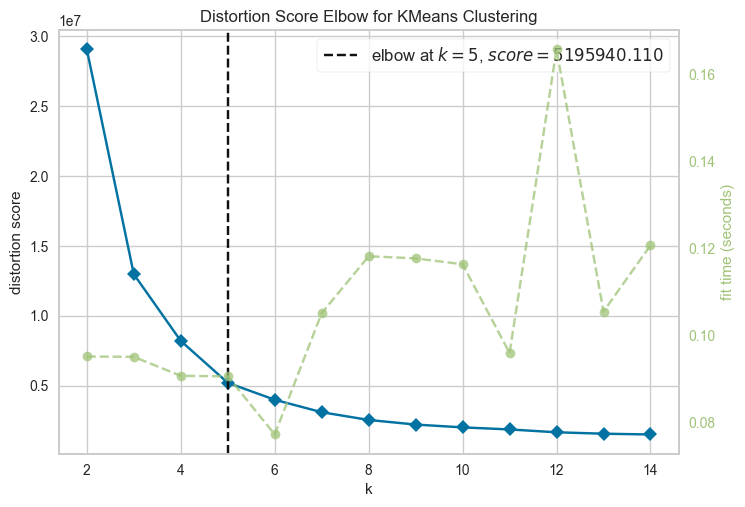


✅ Optimal number of clusters (Elbow): 5
✅ KMeans: Silhouette=0.518, Davies-Bouldin=0.580, Clusters=5


C:\Users\Arunkumara\AppData\Local\Temp\ipykernel_23760\2456898941.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"Cluster_{name}"] = labels


✅ GaussianMixture: Silhouette=0.518, Davies-Bouldin=0.580, Clusters=5


C:\Users\Arunkumara\AppData\Local\Temp\ipykernel_23760\2456898941.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"Cluster_{name}"] = labels


✅ Agglomerative: Silhouette=0.499, Davies-Bouldin=0.596, Clusters=5


C:\Users\Arunkumara\AppData\Local\Temp\ipykernel_23760\2456898941.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"Cluster_{name}"] = labels
c:\Users\Arunkumara\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Arunkumara\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


✅ HDBSCAN: Silhouette=0.041, Davies-Bouldin=1.392, Clusters=7

🏆 Best Performing Model: KMeans

📊 Performance Summary:
              Model  Silhouette_Score  Davies_Bouldin  Num_Clusters  Silhouette_Score_Rank  Davies_Bouldin_Rank  Overall_Score
0           KMeans          0.518066        0.580436             5                    1.5                  1.5            1.5
1  GaussianMixture          0.518066        0.580436             5                    1.5                  1.5            1.5
2    Agglomerative          0.498778        0.596057             5                    3.0                  3.0            3.0
3          HDBSCAN          0.041133        1.391729             7                    4.0                  4.0            4.0


C:\Users\Arunkumara\AppData\Local\Temp\ipykernel_23760\2456898941.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"Cluster_{name}"] = labels
C:\Users\Arunkumara\AppData\Local\Temp\ipykernel_23760\2456898941.py:133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Final_Cluster"] = df[f"Cluster_{best_model}"]
C:\Users\Arunkumara\AppData\Local\Temp\ipykernel_23760\2456898941.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

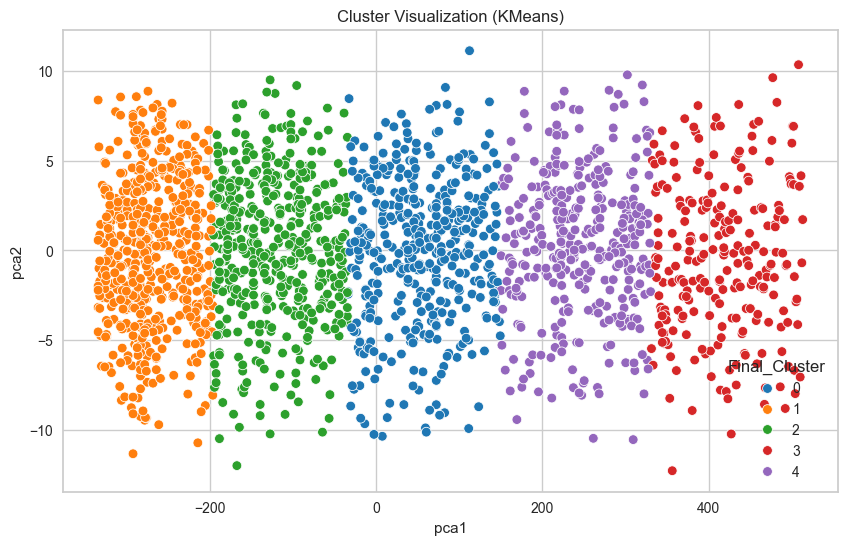


=== Cluster 1 (KMeans) ===
  Provider_ID                                                                                                                                                                                                                Description_List  Claim_Payment_Amount  Utilization_Day_Count
0      2600GD          [Pure hypercholesterolem, Hypertension NOS, CHF NOS, Orthostatic hypotension, Osteoporosis NOS, Syncope and collapse, Retention urine NOS, Adv eff anallrg/antemet, Status cardiac pacemaker, Status autm crd dfbrltr]                4000.0                    1.0
1      3900MB   [Secondary malig neo lung, Secondary malig neo NEC, Hyperlipidemia NEC/NOS, Hypopotassemia, Hypertension NOS, Acute kidney failure NOS, Chr kidney dis stage III, Osteoarthros NOS-unspec, Aphasia, Chest swelling/mass/lump]               26000.0                    6.0
2      3900HM                                                                                                              

In [31]:
# ===============================================================
# 🧠 DiagBERT + Multi-Model Clustering Comparison (Auto Best Model)
# ===============================================================

from transformers import AutoTokenizer, AutoModel
import torch
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer
import hdbscan
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# ---------------------------------------------------------------
# 1️⃣ Load model and tokenizer
# ---------------------------------------------------------------
model_name = "Emmytheo/DiagBERT"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name, output_hidden_states=True)
model.eval()

# ---------------------------------------------------------------
# 2️⃣ Load dataset
# ---------------------------------------------------------------
# Example: df = pd.read_csv("claims_data.csv")
# Your dataset should have: Description_List, Claim_Payment_Amount, Utilization_Day_Count, Provider_ID
df = df_filter.iloc[:2000,:]
text_col = "Description_List"

# ---------------------------------------------------------------
# 3️⃣ Generate DiagBERT embeddings
# ---------------------------------------------------------------
def get_diagbert_embeddings(text_list, tokenizer, model, batch_size=16, max_len=128):
    embeddings = []
    for i in tqdm(range(0, len(text_list), batch_size)):
        batch_texts = text_list[i:i+batch_size]
        encoded = tokenizer(batch_texts, padding=True, truncation=True,
                            max_length=max_len, return_tensors="pt")
        with torch.no_grad():
            outputs = model(**encoded)
            hidden_states = outputs.hidden_states[-1]
            cls_embeddings = hidden_states[:, 0, :]  # CLS token
            embeddings.append(cls_embeddings)
    return torch.cat(embeddings).cpu().numpy()

texts = df[text_col].fillna("").astype(str).tolist()
embeddings = get_diagbert_embeddings(texts, tokenizer, model)

# ---------------------------------------------------------------
# 4️⃣ Combine embeddings with numeric + categorical
# ---------------------------------------------------------------
num_features = df[["Claim_Payment_Amount", "Utilization_Day_Count"]].fillna(0)
num_scaled = StandardScaler().fit_transform(num_features)
provider_encoded = pd.factorize(df["Provider_ID"])[0].reshape(-1, 1)

combined_features = np.hstack([embeddings, num_scaled, provider_encoded])

# ---------------------------------------------------------------
# 5️⃣ Find optimal K for KMeans using Yellowbrick
# ---------------------------------------------------------------
print("\n🔍 Finding optimal K using Elbow method...")
model_k = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_k, k=(2, 15))
visualizer.fit(combined_features)
visualizer.show()

best_k = visualizer.elbow_value_
print(f"\n✅ Optimal number of clusters (Elbow): {best_k}")

# ---------------------------------------------------------------
# 6️⃣ Define clustering algorithms
# ---------------------------------------------------------------
algorithms = {
    "KMeans": KMeans(n_clusters=best_k, random_state=42),
    "GaussianMixture": GaussianMixture(n_components=best_k, random_state=42),
    "Agglomerative": AgglomerativeClustering(n_clusters=best_k),
    "HDBSCAN": hdbscan.HDBSCAN(min_cluster_size=5, metric='euclidean')
}

# ---------------------------------------------------------------
# 7️⃣ Evaluate each algorithm
# ---------------------------------------------------------------
results = []

for name, algo in algorithms.items():
    try:
        labels = algo.fit_predict(combined_features)

        # Skip if algorithm fails to form proper clusters
        if len(set(labels)) <= 1:
            print(f"⚠️ {name}: Only one cluster found — skipping.")
            continue

        sil = silhouette_score(combined_features, labels)
        db = davies_bouldin_score(combined_features, labels)
        num_clusters = len(set(labels))

        results.append({
            "Model": name,
            "Silhouette_Score": sil,
            "Davies_Bouldin": db,
            "Num_Clusters": num_clusters
        })
        print(f"✅ {name}: Silhouette={sil:.3f}, Davies-Bouldin={db:.3f}, Clusters={num_clusters}")

        # Add cluster result temporarily
        df[f"Cluster_{name}"] = labels

    except Exception as e:
        print(f"❌ Error with {name}: {e}")

# ---------------------------------------------------------------
# 8️⃣ Compare results and select best model
# ---------------------------------------------------------------
results_df = pd.DataFrame(results)
results_df["Silhouette_Score_Rank"] = results_df["Silhouette_Score"].rank(ascending=False)
results_df["Davies_Bouldin_Rank"] = results_df["Davies_Bouldin"].rank(ascending=True)
results_df["Overall_Score"] = results_df[["Silhouette_Score_Rank", "Davies_Bouldin_Rank"]].mean(axis=1)
best_model = results_df.sort_values("Overall_Score").iloc[0]["Model"]

print("\n🏆 Best Performing Model:", best_model)
print("\n📊 Performance Summary:\n", results_df)

# ---------------------------------------------------------------
# 9️⃣ Assign best cluster labels
# ---------------------------------------------------------------
df["Final_Cluster"] = df[f"Cluster_{best_model}"]

# ---------------------------------------------------------------
# 🔟 Visualize final clusters (PCA)
# ---------------------------------------------------------------
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(combined_features)
df["pca1"], df["pca2"] = reduced[:, 0], reduced[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="pca1", y="pca2", hue="Final_Cluster", palette="tab10")
plt.title(f"Cluster Visualization ({best_model})")
plt.show()

# ---------------------------------------------------------------
# 🔢 Show few cluster examples
# ---------------------------------------------------------------
for c in df["Final_Cluster"].unique():
    sample = df[df["Final_Cluster"] == c].head(5)
    print(f"\n=== Cluster {c} ({best_model}) ===")
    print(sample[["Provider_ID", "Description_List", "Claim_Payment_Amount", "Utilization_Day_Count"]])


### 2

In [11]:
df = df_filter.iloc[:2000,:].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 0 to 2066
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Provider_ID                  2000 non-null   object 
 1   Claim_Payment_Amount         2000 non-null   float64
 2   Admission_ICD9_Diagnosis     2000 non-null   object 
 3   Utilization_Day_Count        2000 non-null   float64
 4   DRG_Code                     2000 non-null   object 
 5   ICD9_Procedure_Code_List     2000 non-null   object 
 6   ICD9_Diagnosis_Code_List_PX  2000 non-null   object 
 7   Description_List             2000 non-null   object 
dtypes: float64(2), object(6)
memory usage: 140.6+ KB


100%|██████████| 125/125 [05:54<00:00,  2.84s/it]


✅ Best number of clusters (K): 2
✅ Cluster Summary with Labels:
   Cluster  Claim_Payment_Amount_mean  Claim_Payment_Amount_median  Claim_Payment_Amount_max  Utilization_Day_Count_mean  Utilization_Day_Count_median  Utilization_Day_Count_max  Provider_ID_nunique                Cluster_Label
0        0                   10227.56                       7000.0                   57000.0                        5.76                           4.0                       82.0                  482  High-cost long-stay cluster
1        1                    9684.44                       7000.0                   57000.0                        5.60                           4.0                      113.0                  367  Low-cost short-stay cluster


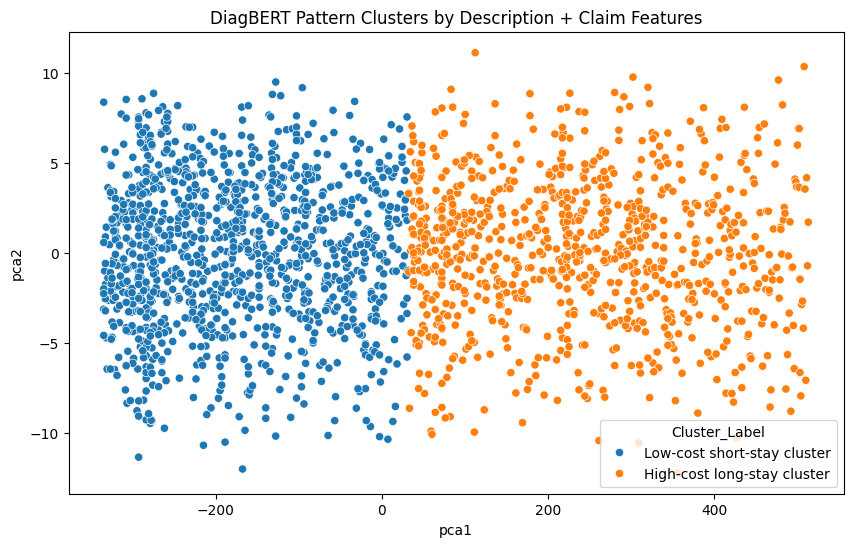


=== Low-cost short-stay cluster ===
                                                                                                                                                                                                                 Description_List  Claim_Payment_Amount  Utilization_Day_Count
0          [Pure hypercholesterolem, Hypertension NOS, CHF NOS, Orthostatic hypotension, Osteoporosis NOS, Syncope and collapse, Retention urine NOS, Adv eff anallrg/antemet, Status cardiac pacemaker, Status autm crd dfbrltr]                4000.0                    1.0
1   [Secondary malig neo lung, Secondary malig neo NEC, Hyperlipidemia NEC/NOS, Hypopotassemia, Hypertension NOS, Acute kidney failure NOS, Chr kidney dis stage III, Osteoarthros NOS-unspec, Aphasia, Chest swelling/mass/lump]               26000.0                    6.0
2                                                                                                                                            [Mental d

In [12]:
from transformers import AutoTokenizer, AutoModel
import torch
import pandas as pd
from tqdm import tqdm
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 1. Load model and tokenizer
# -----------------------------
model_name = "Emmytheo/DiagBERT"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name, output_hidden_states=True)
model.eval()

# -----------------------------
# 2. Load dataset
# -----------------------------
#df = df_filter.iloc[:2000,0].copy()  # replace with actual file path
text_col = "Description_List"

# -----------------------------
# 3. Get DiagBERT embeddings
# -----------------------------
def get_diagbert_embeddings(text_list, tokenizer, model, batch_size=16, max_len=128):
    embeddings = []

    for i in tqdm(range(0, len(text_list), batch_size)):
        batch_texts = text_list[i:i+batch_size]

        encoded = tokenizer(
            batch_texts,
            padding=True,
            truncation=True,
            max_length=max_len,
            return_tensors="pt"
        )

        with torch.no_grad():
            outputs = model(**encoded)
            hidden_states = outputs.hidden_states[-1]  # last layer
            cls_embeddings = hidden_states[:, 0, :]    # CLS token
            embeddings.append(cls_embeddings)

    return torch.cat(embeddings).cpu().numpy()

texts = df[text_col].fillna("").astype(str).tolist()
embeddings = get_diagbert_embeddings(texts, tokenizer, model)

# -----------------------------
# 4. Merge embeddings + numeric
# -----------------------------
num_features = df[["Claim_Payment_Amount", "Utilization_Day_Count"]].fillna(0)
num_features_scaled = StandardScaler().fit_transform(num_features)

provider_encoded = pd.factorize(df["Provider_ID"])[0].reshape(-1, 1)

combined_features = np.hstack([embeddings, num_features_scaled, provider_encoded])

# -----------------------------
# 5. Optimal K using silhouette
# -----------------------------
sil_scores = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(combined_features)
    sil = silhouette_score(combined_features, labels)
    sil_scores.append((k, sil))

best_k = max(sil_scores, key=lambda x: x[1])[0]
print(f"✅ Best number of clusters (K): {best_k}")

# -----------------------------
# 6. Final clustering
# -----------------------------
kmeans = KMeans(n_clusters=best_k, random_state=42)
df["Cluster"] = kmeans.fit_predict(combined_features)

# -----------------------------
# 7. Cluster summary
# -----------------------------
cluster_summary = df.groupby("Cluster").agg({
    "Claim_Payment_Amount": ["mean", "median", "max"],
    "Utilization_Day_Count": ["mean", "median", "max"],
    "Provider_ID": pd.Series.nunique
}).round(2)

cluster_summary.columns = ['_'.join(col) for col in cluster_summary.columns]
cluster_summary.reset_index(inplace=True)

# -----------------------------
# 8. Auto label clusters
# -----------------------------
def label_cluster(row, amount_col="Claim_Payment_Amount_mean", day_col="Utilization_Day_Count_mean"):
    amt = row[amount_col]
    days = row[day_col]

    if amt > cluster_summary[amount_col].mean() and days > cluster_summary[day_col].mean():
        return "High-cost long-stay cluster"
    elif amt > cluster_summary[amount_col].mean() and days <= cluster_summary[day_col].mean():
        return "High-cost short-stay cluster"
    elif amt <= cluster_summary[amount_col].mean() and days > cluster_summary[day_col].mean():
        return "Low-cost long-stay cluster"
    else:
        return "Low-cost short-stay cluster"

cluster_summary["Cluster_Label"] = cluster_summary.apply(label_cluster, axis=1)

# Merge labels back to main df
df = df.merge(cluster_summary[["Cluster", "Cluster_Label"]], on="Cluster", how="left")

print("✅ Cluster Summary with Labels:")
print(cluster_summary)

# -----------------------------
# 9. Visualization
# -----------------------------
pca = PCA(n_components=2)
reduced = pca.fit_transform(combined_features)
df["pca1"], df["pca2"] = reduced[:, 0], reduced[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="pca1", y="pca2", hue="Cluster_Label", palette="tab10")
plt.title("DiagBERT Pattern Clusters by Description + Claim Features")
plt.show()

# -----------------------------
# 10. View examples from each cluster
# -----------------------------
for label in df["Cluster_Label"].unique():
    sample = df[df["Cluster_Label"] == label].head(5)
    print(f"\n=== {label} ===")
    print(sample[["Description_List", "Claim_Payment_Amount", "Utilization_Day_Count"]])


✅ Cluster Summary with Labels:
   Cluster  Claim_Payment_Amount_mean  Claim_Payment_Amount_median  Claim_Payment_Amount_max  Utilization_Day_Count_mean  Utilization_Day_Count_median  Utilization_Day_Count_max  Provider_ID_nunique                Cluster_Label2
0        0                    9938.55                       7000.0                   57000.0                        5.73                           4.0                       42.0                  138    Low-cost long-stay cluster
1        1                    9715.37                       7000.0                   57000.0                        5.79                           4.0                      113.0                  127    Low-cost long-stay cluster
2        2                    9933.50                       7000.0                   57000.0                        5.51                           4.0                       74.0                  134   Low-cost short-stay cluster
3        3                   10261.88                

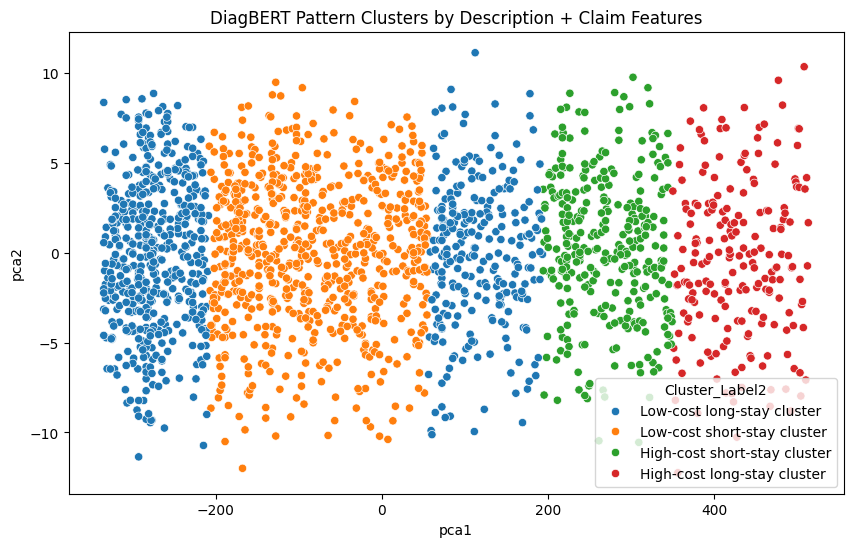


=== Low-cost long-stay cluster ===
                                                                                                                                                                                                                 Description_List  Claim_Payment_Amount  Utilization_Day_Count
0          [Pure hypercholesterolem, Hypertension NOS, CHF NOS, Orthostatic hypotension, Osteoporosis NOS, Syncope and collapse, Retention urine NOS, Adv eff anallrg/antemet, Status cardiac pacemaker, Status autm crd dfbrltr]                4000.0                    1.0
1   [Secondary malig neo lung, Secondary malig neo NEC, Hyperlipidemia NEC/NOS, Hypopotassemia, Hypertension NOS, Acute kidney failure NOS, Chr kidney dis stage III, Osteoarthros NOS-unspec, Aphasia, Chest swelling/mass/lump]               26000.0                    6.0
2                                                                                                                                            [Mental di

In [16]:
# -----------------------------
# 6. Final clustering
# -----------------------------
kmeans = KMeans(n_clusters=6, random_state=42)
df["Cluster"] = kmeans.fit_predict(combined_features)

# -----------------------------
# 7. Cluster summary
# -----------------------------
cluster_summary = df.groupby("Cluster").agg({
    "Claim_Payment_Amount": ["mean", "median", "max"],
    "Utilization_Day_Count": ["mean", "median", "max"],
    "Provider_ID": pd.Series.nunique
}).round(2)

cluster_summary.columns = ['_'.join(col) for col in cluster_summary.columns]
cluster_summary.reset_index(inplace=True)

# -----------------------------
# 8. Auto label clusters
# -----------------------------
def label_cluster(row, amount_col="Claim_Payment_Amount_mean", day_col="Utilization_Day_Count_mean"):
    amt = row[amount_col]
    days = row[day_col]

    if amt > cluster_summary[amount_col].mean() and days > cluster_summary[day_col].mean():
        return "High-cost long-stay cluster"
    elif amt > cluster_summary[amount_col].mean() and days <= cluster_summary[day_col].mean():
        return "High-cost short-stay cluster"
    elif amt <= cluster_summary[amount_col].mean() and days > cluster_summary[day_col].mean():
        return "Low-cost long-stay cluster"
    else:
        return "Low-cost short-stay cluster"

cluster_summary["Cluster_Label2"] = cluster_summary.apply(label_cluster, axis=1)

# Merge labels back to main df
df = df.merge(cluster_summary[["Cluster", "Cluster_Label2"]], on="Cluster", how="left")

print("✅ Cluster Summary with Labels:")
print(cluster_summary)

# -----------------------------
# 9. Visualization
# -----------------------------
pca = PCA(n_components=2)
reduced = pca.fit_transform(combined_features)
df["pca1"], df["pca2"] = reduced[:, 0], reduced[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="pca1", y="pca2", hue="Cluster_Label2", palette="tab10")
plt.title("DiagBERT Pattern Clusters by Description + Claim Features")
plt.show()

# -----------------------------
# 10. View examples from each cluster
# -----------------------------
for label in df["Cluster_Label2"].unique():
    sample = df[df["Cluster_Label2"] == label].head(5)
    print(f"\n=== {label} ===")
    print(sample[["Description_List", "Claim_Payment_Amount", "Utilization_Day_Count"]])

### 3

In [17]:
df = df_filter.iloc[0:2000,:]

100%|██████████| 125/125 [05:47<00:00,  2.78s/it]


✅ Best number of clusters (K): 2

✅ Cluster Summary with Provider Insights:
   Cluster                Cluster_Label  Claim_Payment_Amount_mean  Utilization_Day_Count_mean  Unique_Providers Top_Provider_ID
0        0  High-cost long-stay cluster                   10227.56                        5.76               482          3600NG
1        1  Low-cost short-stay cluster                    9684.44                        5.60               367          23006G


C:\Users\Arunkumara\AppData\Local\Temp\ipykernel_23760\429050512.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Cluster"] = kmeans.fit_predict(combined_features)


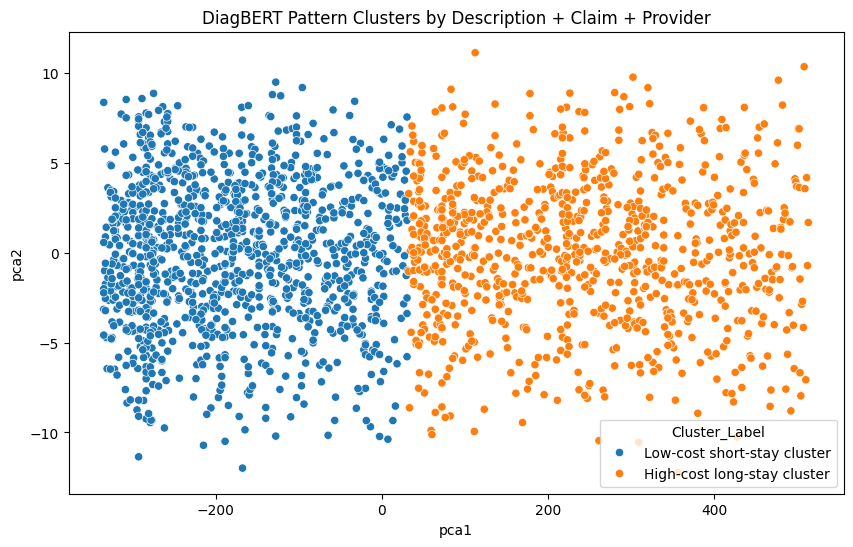


=== Low-cost short-stay cluster ===
  Provider_ID                                                                                                                                                                                                                Description_List  Claim_Payment_Amount  Utilization_Day_Count
0      2600GD          [Pure hypercholesterolem, Hypertension NOS, CHF NOS, Orthostatic hypotension, Osteoporosis NOS, Syncope and collapse, Retention urine NOS, Adv eff anallrg/antemet, Status cardiac pacemaker, Status autm crd dfbrltr]                4000.0                    1.0
1      3900MB   [Secondary malig neo lung, Secondary malig neo NEC, Hyperlipidemia NEC/NOS, Hypopotassemia, Hypertension NOS, Acute kidney failure NOS, Chr kidney dis stage III, Osteoarthros NOS-unspec, Aphasia, Chest swelling/mass/lump]               26000.0                    6.0
2      3900HM                                                                                                     

In [18]:
from transformers import AutoTokenizer, AutoModel
import torch
import pandas as pd
from tqdm import tqdm
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# -----------------------------
# 1. Load model and tokenizer
# -----------------------------
model_name = "Emmytheo/DiagBERT"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name, output_hidden_states=True)
model.eval()

# -----------------------------
# 2. Load dataset
# -----------------------------
# df = pd.read_csv("your_file.csv")
text_col = "Description_List"

# -----------------------------
# 3. Get DiagBERT embeddings
# -----------------------------
def get_diagbert_embeddings(text_list, tokenizer, model, batch_size=16, max_len=128):
    embeddings = []

    for i in tqdm(range(0, len(text_list), batch_size)):
        batch_texts = text_list[i:i+batch_size]

        encoded = tokenizer(
            batch_texts,
            padding=True,
            truncation=True,
            max_length=max_len,
            return_tensors="pt"
        )

        with torch.no_grad():
            outputs = model(**encoded)
            hidden_states = outputs.hidden_states[-1]  # last layer
            cls_embeddings = hidden_states[:, 0, :]    # CLS token
            embeddings.append(cls_embeddings)

    return torch.cat(embeddings).cpu().numpy()

texts = df[text_col].fillna("").astype(str).tolist()
embeddings = get_diagbert_embeddings(texts, tokenizer, model)

# -----------------------------
# 4. Merge embeddings + numeric
# -----------------------------
num_features = df[["Claim_Payment_Amount", "Utilization_Day_Count"]].fillna(0)
num_features_scaled = StandardScaler().fit_transform(num_features)

provider_encoded = pd.factorize(df["Provider_ID"])[0].reshape(-1, 1)

combined_features = np.hstack([embeddings, num_features_scaled, provider_encoded])

# -----------------------------
# 5. Optimal K using silhouette
# -----------------------------
sil_scores = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(combined_features)
    sil = silhouette_score(combined_features, labels)
    sil_scores.append((k, sil))

best_k = max(sil_scores, key=lambda x: x[1])[0]
print(f"✅ Best number of clusters (K): {best_k}")

# -----------------------------
# 6. Final clustering
# -----------------------------
kmeans = KMeans(n_clusters=best_k, random_state=42)
df["Cluster"] = kmeans.fit_predict(combined_features)

# -----------------------------
# 7. Cluster summary with Provider_ID
# -----------------------------
# Aggregate basic stats
cluster_summary = df.groupby("Cluster").agg({
    "Claim_Payment_Amount": ["mean", "median", "max"],
    "Utilization_Day_Count": ["mean", "median", "max"],
    "Provider_ID": [pd.Series.nunique, lambda x: Counter(x).most_common(1)[0][0]]  # most frequent Provider_ID
}).round(2)

cluster_summary.columns = ['_'.join(col) for col in cluster_summary.columns]
cluster_summary.rename(columns={
    "Provider_ID_<lambda_0>": "Top_Provider_ID",
    "Provider_ID_nunique": "Unique_Providers"
}, inplace=True)
cluster_summary.reset_index(inplace=True)

# -----------------------------
# 8. Auto label clusters
# -----------------------------
def label_cluster(row, amount_col="Claim_Payment_Amount_mean", day_col="Utilization_Day_Count_mean"):
    amt = row[amount_col]
    days = row[day_col]

    if amt > cluster_summary[amount_col].mean() and days > cluster_summary[day_col].mean():
        return "High-cost long-stay cluster"
    elif amt > cluster_summary[amount_col].mean() and days <= cluster_summary[day_col].mean():
        return "High-cost short-stay cluster"
    elif amt <= cluster_summary[amount_col].mean() and days > cluster_summary[day_col].mean():
        return "Low-cost long-stay cluster"
    else:
        return "Low-cost short-stay cluster"

cluster_summary["Cluster_Label"] = cluster_summary.apply(label_cluster, axis=1)

# Merge labels back
df = df.merge(cluster_summary[["Cluster", "Cluster_Label"]], on="Cluster", how="left")

print("\n✅ Cluster Summary with Provider Insights:")
print(cluster_summary[["Cluster", "Cluster_Label", "Claim_Payment_Amount_mean",
                       "Utilization_Day_Count_mean", "Unique_Providers", "Top_Provider_ID"]])

# -----------------------------
# 9. Visualization
# -----------------------------
pca = PCA(n_components=2)
reduced = pca.fit_transform(combined_features)
df["pca1"], df["pca2"] = reduced[:, 0], reduced[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="pca1", y="pca2", hue="Cluster_Label", palette="tab10")
plt.title("DiagBERT Pattern Clusters by Description + Claim + Provider")
plt.show()

# -----------------------------
# 10. View examples (with Provider_ID)
# -----------------------------
for label in df["Cluster_Label"].unique():
    sample = df[df["Cluster_Label"] == label].head(5)
    print(f"\n=== {label} ===")
    print(sample[["Provider_ID", "Description_List", "Claim_Payment_Amount", "Utilization_Day_Count"]])

# -----------------------------
# 11. Optional: Provider breakdown per cluster
# -----------------------------
provider_breakdown = (
    df.groupby(["Cluster_Label", "Provider_ID"])
      .size()
      .reset_index(name="Count")
      .sort_values(["Cluster_Label", "Count"], ascending=[True, False])
)

print("\n📊 Top Providers per Cluster:")
print(provider_breakdown.groupby("Cluster_Label").head(5))


K=2, Silhouette Score=0.6220
K=3, Silhouette Score=0.5788
K=4, Silhouette Score=0.5226
K=5, Silhouette Score=0.5181
K=6, Silhouette Score=0.4833
K=7, Silhouette Score=0.4696
K=8, Silhouette Score=0.4449
K=9, Silhouette Score=0.4275
K=10, Silhouette Score=0.3871
K=11, Silhouette Score=0.3851
K=12, Silhouette Score=0.3530
K=13, Silhouette Score=0.3254
K=14, Silhouette Score=0.3124


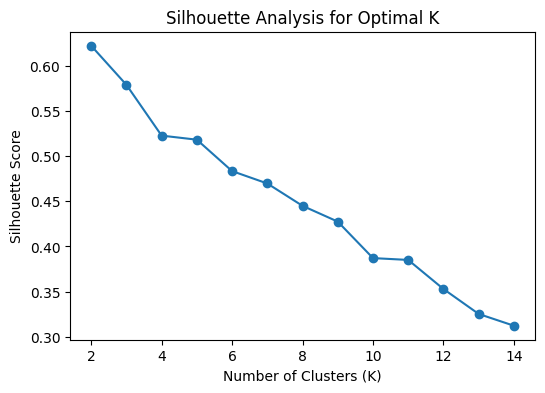

In [19]:
# -----------------------------
# 4. Find optimal K (Silhouette)
# -----------------------------
k_range = range(2, 15)
sil_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(combined_features)
    sil = silhouette_score(combined_features, labels)
    sil_scores.append(sil)
    print(f"K={k}, Silhouette Score={sil:.4f}")

# Plot silhouette scores
plt.figure(figsize=(6,4))
plt.plot(k_range, sil_scores, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for Optimal K")
plt.show()



✅ Cluster Summary with Provider Insights:
   Cluster                Cluster_Label1  Claim_Payment_Amount_mean  Utilization_Day_Count_mean  Unique_Providers Top_Provider_ID
0        0   Low-cost short-stay cluster                    9246.48                        5.22                83          3900NM
1        1    Low-cost long-stay cluster                    9526.82                        5.97                88          23006G
2        2   Low-cost short-stay cluster                    9489.81                        5.53                82          2200JA
3        3   Low-cost short-stay cluster                    9568.79                        5.26                86          0503SD
4        4   Low-cost short-stay cluster                    8311.68                        5.17                87          1401YS
5        5   High-cost long-stay cluster                   11228.48                        5.90                87          2600ZT
6        6  High-cost short-stay cluster       

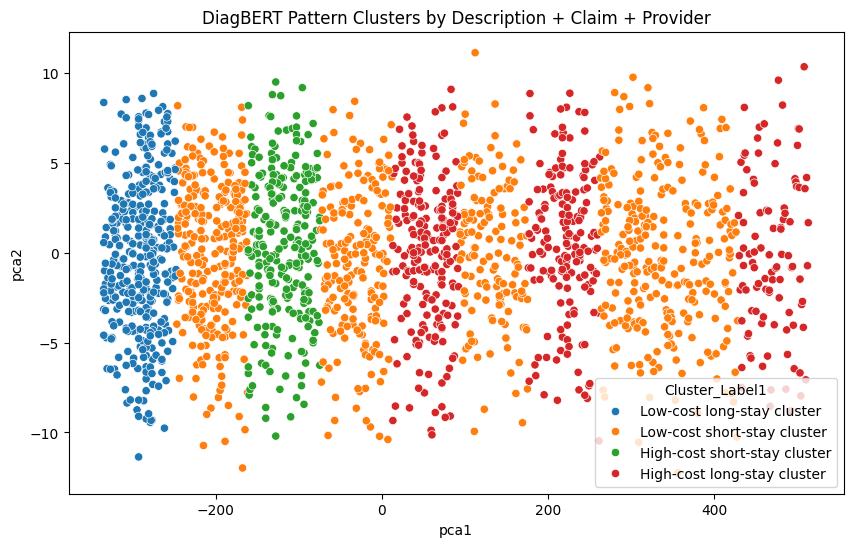


=== Low-cost long-stay cluster ===
  Provider_ID                                                                                                                                                                                                                Description_List  Claim_Payment_Amount  Utilization_Day_Count
0      2600GD          [Pure hypercholesterolem, Hypertension NOS, CHF NOS, Orthostatic hypotension, Osteoporosis NOS, Syncope and collapse, Retention urine NOS, Adv eff anallrg/antemet, Status cardiac pacemaker, Status autm crd dfbrltr]                4000.0                    1.0
1      3900MB   [Secondary malig neo lung, Secondary malig neo NEC, Hyperlipidemia NEC/NOS, Hypopotassemia, Hypertension NOS, Acute kidney failure NOS, Chr kidney dis stage III, Osteoarthros NOS-unspec, Aphasia, Chest swelling/mass/lump]               26000.0                    6.0
2      3900HM                                                                                                      

In [20]:
# -----------------------------
# 6. Final clustering
# -----------------------------
kmeans = KMeans(n_clusters=10, random_state=42)
df["Cluster"] = kmeans.fit_predict(combined_features)

# -----------------------------
# 7. Cluster summary with Provider_ID
# -----------------------------
# Aggregate basic stats
cluster_summary = df.groupby("Cluster").agg({
    "Claim_Payment_Amount": ["mean", "median", "max"],
    "Utilization_Day_Count": ["mean", "median", "max"],
    "Provider_ID": [pd.Series.nunique, lambda x: Counter(x).most_common(1)[0][0]]  # most frequent Provider_ID
}).round(2)

cluster_summary.columns = ['_'.join(col) for col in cluster_summary.columns]
cluster_summary.rename(columns={
    "Provider_ID_<lambda_0>": "Top_Provider_ID",
    "Provider_ID_nunique": "Unique_Providers"
}, inplace=True)
cluster_summary.reset_index(inplace=True)

# -----------------------------
# 8. Auto label clusters
# -----------------------------
def label_cluster(row, amount_col="Claim_Payment_Amount_mean", day_col="Utilization_Day_Count_mean"):
    amt = row[amount_col]
    days = row[day_col]

    if amt > cluster_summary[amount_col].mean() and days > cluster_summary[day_col].mean():
        return "High-cost long-stay cluster"
    elif amt > cluster_summary[amount_col].mean() and days <= cluster_summary[day_col].mean():
        return "High-cost short-stay cluster"
    elif amt <= cluster_summary[amount_col].mean() and days > cluster_summary[day_col].mean():
        return "Low-cost long-stay cluster"
    else:
        return "Low-cost short-stay cluster"

cluster_summary["Cluster_Label1"] = cluster_summary.apply(label_cluster, axis=1)

# Merge labels back
df = df.merge(cluster_summary[["Cluster", "Cluster_Label1"]], on="Cluster", how="left")

print("\n✅ Cluster Summary with Provider Insights:")
print(cluster_summary[["Cluster", "Cluster_Label1", "Claim_Payment_Amount_mean",
                       "Utilization_Day_Count_mean", "Unique_Providers", "Top_Provider_ID"]])

# -----------------------------
# 9. Visualization
# -----------------------------
pca = PCA(n_components=2)
reduced = pca.fit_transform(combined_features)
df["pca1"], df["pca2"] = reduced[:, 0], reduced[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="pca1", y="pca2", hue="Cluster_Label1", palette="tab10")
plt.title("DiagBERT Pattern Clusters by Description + Claim + Provider")
plt.show()

# -----------------------------
# 10. View examples (with Provider_ID)
# -----------------------------
for label in df["Cluster_Label1"].unique():
    sample = df[df["Cluster_Label1"] == label].head(5)
    print(f"\n=== {label} ===")
    print(sample[["Provider_ID", "Description_List", "Claim_Payment_Amount", "Utilization_Day_Count"]])

# -----------------------------
# 11. Optional: Provider breakdown per cluster
# -----------------------------
provider_breakdown = (
    df.groupby(["Cluster_Label", "Provider_ID"])
      .size()
      .reset_index(name="Count")
      .sort_values(["Cluster_Label", "Count"], ascending=[True, False])
)

print("\n📊 Top Providers per Cluster:")
print(provider_breakdown.groupby("Cluster_Label").head(5))


#### finetune

In [22]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


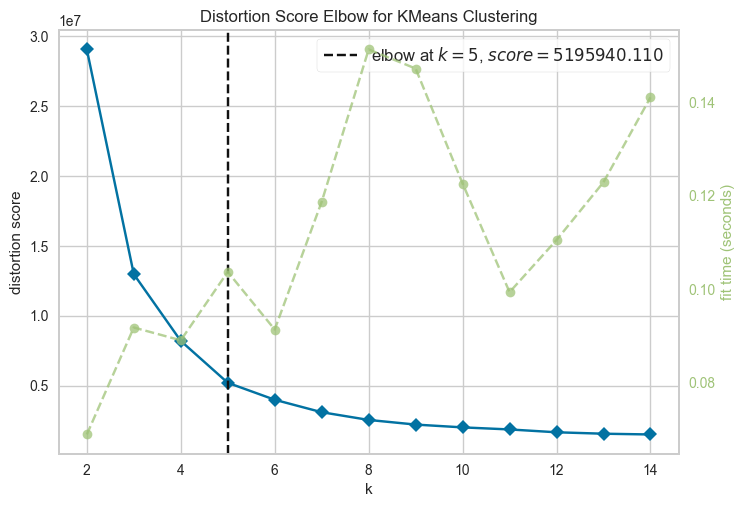

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 15))
visualizer.fit(combined_features)
visualizer.show()


In [24]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=5, random_state=42)
df["Cluster"] = gmm.fit_predict(combined_features)


In [25]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=5)
df["Cluster_agglo"] = agg.fit_predict(combined_features)


In [26]:
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=5, metric='euclidean')
df["Cluster_hdbc"] = clusterer.fit_predict(combined_features)


c:\Users\Arunkumara\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Arunkumara\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [27]:
kmeans = KMeans(n_clusters=5, random_state=42)
df["Cluster_kmeans"] = kmeans.fit_predict(combined_features)

In [28]:
df.head()

,Provider_ID,Claim_Payment_Amount,Admission_ICD9_Diagnosis,Utilization_Day_Count,DRG_Code,ICD9_Procedure_Code_List,ICD9_Diagnosis_Code_List_PX,Description_List,Cluster,Cluster_Label,pca1,pca2,Cluster_Label1,Cluster_agglo,Cluster_hdbc,Cluster_kmeans
0,2600GD,4000.0,4580,1.0,217,[],"[2720, 4019, 4280, 4580, 73300, 7802, 78820, E9330, V4501, V4502]","[Pure hypercholesterolem, Hypertension NOS, CHF NOS, Orthostatic hypotension, Osteoporosis NOS, Syncope and collapse, Retention urine NOS, Adv eff anallrg/antemet, Status cardiac pacemaker, Status autm crd dfbrltr]",1,Low-cost short-stay cluster,-334.792600,-3.144256,Low-cost long-stay cluster,0,0,1
1,3900MB,26000.0,7866,6.0,201,[],"[1970, 19889, 2724, 2768, 4019, 5849, 5853, 71590, 7843, 7866]","[Secondary malig neo lung, Secondary malig neo NEC, Hyperlipidemia NEC/NOS, Hypopotassemia, Hypertension NOS, Acute kidney failure NOS, Chr kidney dis stage III, Osteoarthros NOS-unspec, Aphasia, Chest swelling/mass/lump]",1,Low-cost short-stay cluster,-333.797303,-0.998004,Low-cost long-stay cluster,0,0,1
2,3900HM,5000.0,6186,2.0,750,"[6186, 7092, V5866]","[2948, 56400, 6186, 6186]","[Mental disor NEC oth dis, Constipation NOS, Vaginal enterocele, Vaginal enterocele]",1,Low-cost short-stay cluster,-332.789102,-1.731330,Low-cost long-stay cluster,0,0,1
3,3913XU,5000.0,29590,3.0,883,[],"[29590, 29623, 30390, 32723, 34590, 71690, V1581]","[Schizophrenia NOS-unspec, Depress psychosis-severe, Alcoh dep NEC/NOS-unspec, Obstructive sleep apnea, Epilep NOS w/o intr epil, Arthropathy NOS-unspec, Hx of past noncompliance]",1,Low-cost short-stay cluster,-331.788032,-4.723388,Low-cost long-stay cluster,0,0,1
4,3900MB,16000.0,5849,5.0,983,[E8889],"[2639, 3542, 3569, 4019, 4271, 5849, 7840, 7856, 78820, V8801]","[Protein-cal malnutr NOS, Ulnar nerve lesion, Idio periph neurpthy NOS, Hypertension NOS, Parox ventric tachycard, Acute kidney failure NOS, Headache, Enlargement lymph nodes, Retention urine NOS, Acq absnce cervix/uterus]",1,Low-cost short-stay cluster,-333.788632,5.777970,Low-cost long-stay cluster,0,0,1


In [29]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

def evaluate_clustering(features, labels, name="Model"):
    sil = silhouette_score(features, labels)
    db = davies_bouldin_score(features, labels)
    ch = calinski_harabasz_score(features, labels)
    return {
        "Model": name,
        "Silhouette": round(sil, 4),
        "DaviesBouldin": round(db, 4),
        "CalinskiHarabasz": round(ch, 2)
    }


In [ ]:
results = []

# Original setup
labels_orig = kmeans.fit_predict(combined_features)
results.append(evaluate_clustering(combined_features, labels_orig, "Original CLS"))

# Mean-pooled embeddings
labels_mean = kmeans.fit_predict(mean_pooled_features)
results.append(evaluate_clustering(mean_pooled_features, labels_mean, "Mean Pooling"))

# UMAP + KMeans
labels_umap = kmeans.fit_predict(umap_features)
results.append(evaluate_clustering(umap_features, labels_umap, "UMAP + KMeans"))

# Gaussian Mixture
labels_gmm = gmm.fit_predict(combined_features)
results.append(evaluate_clustering(combined_features, labels_gmm, "Gaussian Mixture"))

# Fine-tuned DiagBERT
##labels_ft = kmeans.fit_predict(finetuned_embeddings)
results.append(evaluate_clustering(finetuned_embeddings, labels_ft, "Fine-Tuned DiagBERT"))


NameError: name 'mean_pooled_features' is not defined

### 1

In [5]:
df_filter_1 = df_filter.iloc[0:2000,:].copy()
df_filter_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 0 to 2066
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Provider_ID                  2000 non-null   object 
 1   Claim_Payment_Amount         2000 non-null   float64
 2   Admission_ICD9_Diagnosis     2000 non-null   object 
 3   Utilization_Day_Count        2000 non-null   float64
 4   DRG_Code                     2000 non-null   object 
 5   ICD9_Procedure_Code_List     2000 non-null   object 
 6   ICD9_Diagnosis_Code_List_PX  2000 non-null   object 
 7   Description_List             2000 non-null   object 
dtypes: float64(2), object(6)
memory usage: 140.6+ KB


In [6]:
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np
from tqdm import tqdm

model_name = "Emmytheo/DiagBERT"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)
model.eval()

c:\Users\Arunkumara\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(28996, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [7]:
import ast

def normalize_diagnosis(value):
    # Case 1: Already a list
    if isinstance(value, list):
        return [str(v).strip() for v in value if isinstance(v, str)]
    
    # Case 2: String that looks like a list (e.g. "['A','B']")
    if isinstance(value, str):
        try:
            parsed = ast.literal_eval(value)
            if isinstance(parsed, list):
                return [str(v).strip() for v in parsed]
            else:
                return [value.strip()]
        except:
            return [value.strip()]
    
    # Case 3: Anything else (NaN, None, float)
    return []

df_filter_1["Description_List"] = df_filter_1["Description_List"].apply(normalize_diagnosis)


In [ ]:
def get_diagbert_embedding_list(diagnosis_list):
    all_vecs = []
    for diag in diagnosis_list:
        if not isinstance(diag, str) or len(diag.strip()) == 0:
            continue
        inputs = tokenizer(diag, return_tensors="pt", truncation=True, padding=True, max_length=128)
        with torch.no_grad():
            outputs = model(**inputs)
        emb = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
        all_vecs.append(emb)
    if len(all_vecs) > 0:
        return np.mean(np.vstack(all_vecs), axis=0)
    else:
        # empty list case
        return np.zeros(model.config.hidden_size)

In [ ]:
embeddings = []
for diag_list in tqdm(df_filter_1["Description_List"], desc="Extracting embeddings"):
    vec = get_diagbert_embedding_list(diag_list)
    embeddings.append(vec)

X_text = np.vstack(embeddings)
print("Shape:", X_text.shape)
